In [1]:
import sys
import re
import os
from datetime import datetime
from time import sleep
from IPython.display import display, clear_output, HTML

# set working dir
WORKING_DIR = re.sub('jdi-qasp-ml.*$','',os.path.normpath(os.getcwd())) + 'jdi-qasp-ml'
os.chdir(WORKING_DIR)

import utils
from utils import *
import torch
import pandas as pd
import numpy as np
import torch
from glob import glob
import selenium
from tqdm.auto import tqdm

START_TS = datetime.now()
display(HTML(f'{START_TS} - Current working directory: <b>{WORKING_DIR}</b>'))

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import numba



2021-06-22 13:18:56,928 -INFO - config:config.py:16 - Module utils.config was loaded
2021-06-22 13:18:56,930 -INFO - common:common.py:618 - Module utils.common is loaded...
2021-06-22 13:18:56,932 -INFO - hidden:hidden.py:121 - hidden module is loaded
2021-06-22 13:18:57,230 -INFO - features_builder:features_builder.py:305 - feature_bilder module is loaded...
2021-06-22 13:18:57,231 -INFO - dataset_builder:dataset_builder.py:207 - dataset package is loaded...
2021-06-22 13:18:57,541 -INFO - dataset:dataset.py:277 - dataset module is loaded...


In [2]:
from utils import get_all_elements, iou_xywh, screenshot, maximize_window, get_parents_list, build_tree_dict, DatasetBuilder

In [3]:
selenium.__version__

'3.141.0'

# Parameters

In [4]:
SITE_URL = 'https://vk.com'
WAIT_TIME_SECONDS = 7

# LOGIN = 'Roman'
# PASSWORD = 'Jdi1234'
# SAVE_SCREEN = True
# HEADLESS = True #False

In [5]:
with open('dataset/classes.txt', 'r') as f:
    decoder_dict = { i:s.strip() for i, s in  enumerate(f.readlines())}
    encoder_dict = { v: k for k, v in decoder_dict.items()}
decoder_dict, encoder_dict

({0: 'button',
  1: 'link',
  2: 'textfield',
  3: 'dropdown',
  4: 'checkbox',
  5: 'radiobutton',
  6: 'textarea',
  7: 'fileinput',
  8: 'iframe',
  9: 'range',
  10: 'progressbar',
  11: 'datetimeselector',
  12: 'colorpicker',
  13: 'numberselector',
  14: 'selector',
  15: 'table',
  16: 'switch',
  17: 'slider',
  18: 'tree-node',
  19: 'steper',
  20: 'tab',
  21: 'n/a'},
 {'button': 0,
  'link': 1,
  'textfield': 2,
  'dropdown': 3,
  'checkbox': 4,
  'radiobutton': 5,
  'textarea': 6,
  'fileinput': 7,
  'iframe': 8,
  'range': 9,
  'progressbar': 10,
  'datetimeselector': 11,
  'colorpicker': 12,
  'numberselector': 13,
  'selector': 14,
  'table': 15,
  'switch': 16,
  'slider': 17,
  'tree-node': 18,
  'steper': 19,
  'tab': 20,
  'n/a': 21})

# Generate dataset

In [6]:
DATASET_NAME = 'vk-com'

In [7]:
# class JDIDatasetBuilder(DatasetBuilder):

#     def setUp(self, driver):
#         self.logger.info(f'getting page')
#         driver.get(SITE_URL)
#         #driver.set_window_size(width=1920, height=8400)
#         driver.set_window_size(width=1500, height=1200)
        
# #         driver.find_element_by_id("user-icon").click()
# #         driver.find_element_by_id("name").send_keys(LOGIN)
# #         driver.find_element_by_id("password").send_keys(PASSWORD)
# #         driver.find_element_by_id("login-button").click()
#         sleep(WAIT_TIME_SECONDS)
        
# #         driver.find_element_by_link_text("Service").click()
# #         driver.find_element_by_link_text("Complex Table").click()
# #         maximize_window(driver=driver)
        
# # with JDIDatasetBuilder(url=SITE_URL, dataset_name=DATASET_NAME, headless=False) as builder:
# #     elements_df = builder.dataset
# #     plt.imshow(plt.imread(f'dataset/images/{DATASET_NAME}.png'))
    
# builder = JDIDatasetBuilder(url=SITE_URL, dataset_name=DATASET_NAME, headless=False)
# elements_df = builder.dataset
# plt.imshow(plt.imread(f'dataset/images/{DATASET_NAME}.png'))

In [8]:
df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')

In [9]:
df = build_features(df)

2021-06-22 13:18:57,832 -INFO - hidden:hidden.py:107 - build field "is_hidden"


In [10]:
elements_dict = build_elements_dict(df)

In [11]:
df[['tag_name', 'element_id', 'parent_id', 'upper_sibling', 'lower_sibling', 'displayed', 'is_hidden', 'x', 'y', 'width', 'height']]

,tag_name,element_id,parent_id,upper_sibling,lower_sibling,displayed,is_hidden,x,y,width,height
0,HTML,4599774299563209716405270893,None,None,None,True,0,0.000000,0.0,1484.000000,48.0
1,HEAD,3804248233563209718498780853,4599774299563209716405270893,None,8134665035563209719495643397,False,0,0.000000,0.0,0.000000,0.0
2,META,4928351374563209713616251922,3804248233563209718498780853,None,2767110338563209710778993413,False,0,0.000000,0.0,0.000000,0.0
3,LINK,2767110338563209710778993413,3804248233563209718498780853,4928351374563209713616251922,4427486827563209718333767317,False,0,0.000000,0.0,0.000000,0.0
4,LINK,4427486827563209718333767317,3804248233563209718498780853,2767110338563209710778993413,4632108000563209717549778681,False,0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
352,A,3846714914563209716628275200,7997656789563209719666084676,None,4401240029563209718056095946,True,1,564.796875,938.0,128.390625,15.0
353,SPAN,4401240029563209718056095946,7997656789563209719666084676,3846714914563209716628275200,None,True,1,1190.000000,935.0,24.000000,24.0
354,DIV,6945066523563209716724041494,8134665035563209719495643397,7057022653563209717409464467,None,False,1,0.000000,48.0,1484.000000,0.0
355,DIV,5699561294563209715898804267,6945066523563209716724041494,None,None,False,1,0.000000,-10000.0,0.000000,0.0


In [12]:
# img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
# img_height, img_width = img.shape
# print(img_width, img_height)
# plt.figure(figsize=(15, 100))
# plt.imshow(img, cmap='gray')

In [13]:
predictions_df = rule_base_predict(df)
print(predictions_df.shape)
# predictions_df

2021-06-22 13:18:58,256 -INFO - common:common.py:491 - Num radio buttons found: 0
2021-06-22 13:18:58,259 -INFO - common:common.py:495 - Num radio2 buttons found: 0
2021-06-22 13:18:58,263 -INFO - common:common.py:502 - Num checkboxes found: 2
2021-06-22 13:18:58,265 -INFO - common:common.py:509 - Num comboboxes/dropdowns found: 0
2021-06-22 13:18:58,267 -INFO - common:common.py:520 - Num textfields found: 8
2021-06-22 13:18:58,269 -INFO - common:common.py:525 - Num texfields for numbers found: 0
2021-06-22 13:18:58,271 -INFO - common:common.py:530 - Num ranges found: 0
2021-06-22 13:18:58,273 -INFO - common:common.py:535 - Num ordinary text inputs found: 0
2021-06-22 13:18:58,275 -INFO - common:common.py:538 - Num buttons found: 4
2021-06-22 13:18:58,276 -INFO - common:common.py:543 - Num buttons1 found: 0
2021-06-22 13:18:58,279 -INFO - common:common.py:548 - Num buttons2 (Material-UI) found: 0
2021-06-22 13:18:58,281 -INFO - common:common.py:553 - Num links found: 34
(2, 8)


In [14]:
predictions_df.columns

Index(['element_id', 'x', 'y', 'width', 'height', 'displayed', 'is_hidden',
       'label'],
      dtype='object')

In [15]:
radio_df = df[(df.tag_name == 'LABEL') & 
              df.attributes.apply(lambda x: x.get('class') == 'j-list-item filters-item') & 
              df.displayed & (df.is_hidden == 0) & (df.width > 0.0) & (df.height>0.0)
             ].copy()
radio_df['label'] = encoder_dict['radiobutton']
radio_df = radio_df[predictions_df.columns]

In [16]:
radio_df

,element_id,x,y,width,height,displayed,is_hidden,label


In [17]:
checkbox_df = df[(df.tag_name == 'LABEL') & 
              df.attributes.apply(lambda x: x.get('class') == 'j-list-item filters-item c-checkbox-withText-v1') & 
              df.displayed & (df.is_hidden == 0) & (df.width > 0.0) & (df.height>0.0)
             ].copy()
checkbox_df['label'] = encoder_dict['checkbox']
checkbox_df = checkbox_df[predictions_df.columns]
checkbox_df

,element_id,x,y,width,height,displayed,is_hidden,label


In [18]:
predictions_df = pd.concat([predictions_df, radio_df, checkbox_df])

1484 968


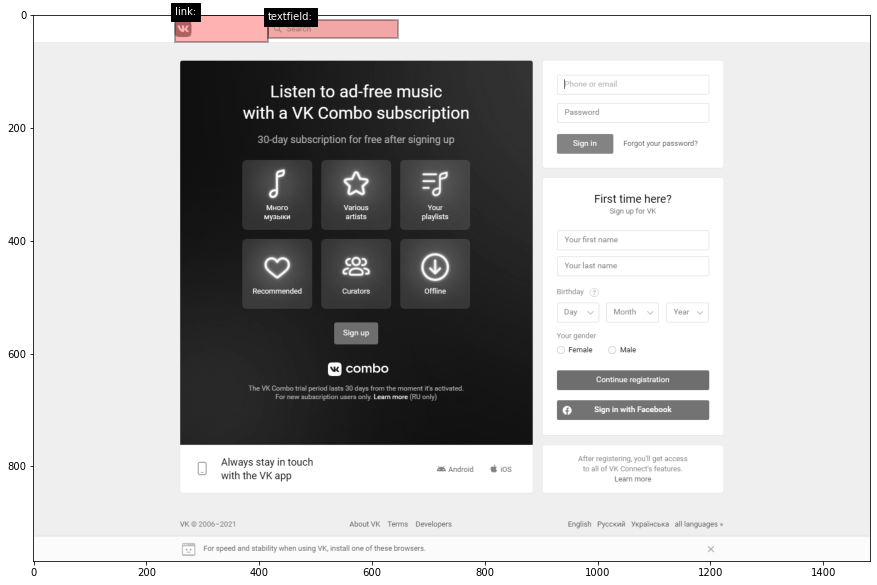

In [19]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in predictions_df.iterrows():
    
    patch = patches.Rectangle((r.x, r.y), r.width, r.height, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    axes.add_patch(patch)
    plt.text(r.x, r.y, 
             decoder_dict[r.label] + ':',  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
    

# Generate and Save Labels

In [20]:
# labels = build_to_yolo(df = predictions_df, img_width=img_width, img_heght=img_height)
# labels

In [21]:
# labeled_df = pd.DataFrame(labels, columns=['label', 'x', 'y', 'width', 'height'])
# labeled_df.label = labeled_df.label.astype(int)
# display(labeled_df)
# labeled_df.to_csv(f'dataset/annotations/{DATASET_NAME}.txt', header=False, sep=' ', index=False)

# Preview Labels

In [22]:
boxes_df = pd.read_csv(f'dataset/annotations/{DATASET_NAME}.txt', sep=' ', names = ['label', 'x', 'y', 'width', 'height'])
boxes_df
boxes_df['box'] = boxes_df.apply(lambda r: from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height), axis=1)
boxes_df.head()

,label,x,y,width,height,box
0,1,0.222035,0.025826,0.111186,0.037190,"(246, 6, 165, 35)"
1,2,0.358154,0.025310,0.154313,0.032025,"(417, 8, 229, 31)"
2,1,0.397574,0.932851,0.041779,0.014463,"(558, 895, 62, 14)"
3,1,0.436995,0.933368,0.026280,0.017562,"(629, 895, 38, 17)"
4,1,0.479447,0.933884,0.046496,0.014463,"(676, 896, 69, 14)"


1484 968


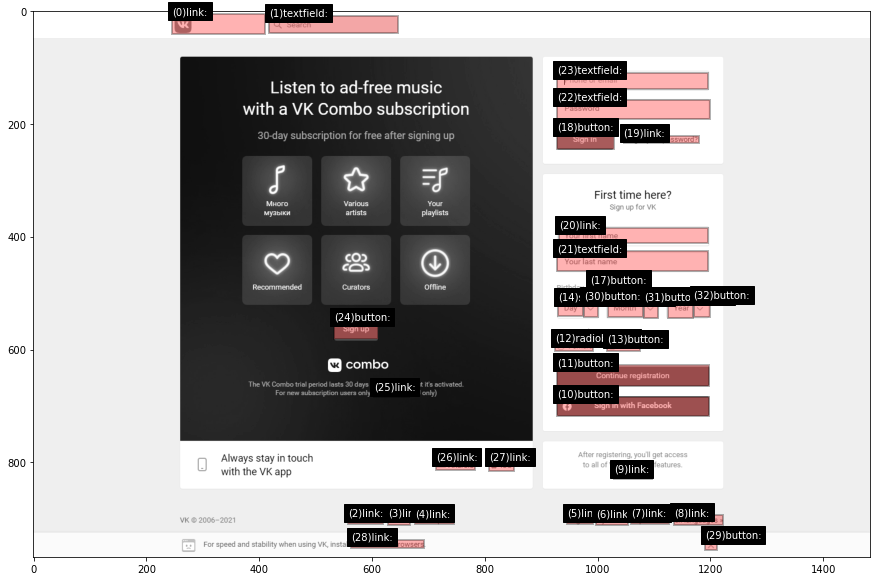

In [23]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for i, r in boxes_df.iterrows():
    x, y, w, h = from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height)    
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    axes.add_patch(patch)
    plt.text(x, y, 
             f'({i})' + decoder_dict[r.label] + ':',  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
    

# Preview Assigned Labels

In [24]:
# df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')
df.columns

Index(['attributes', 'displayed', 'element_id', 'height', 'onmouseenter',
       'onmouseover', 'parent_id', 'style', 'tag_name', 'text', 'width', 'x',
       'y', 'is_hidden', 'upper_sibling', 'lower_sibling', 'siblings'],
      dtype='object')

In [25]:
columns_to_drop = set(df.columns).intersection(set(['label', 'annotation_line_no', 'iou', 'tag', 'label_text']))
if len(columns_to_drop) >= 0:
    df.drop(columns=columns_to_drop, inplace=True)

In [26]:
df = assign_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=img_width, img_height=img_height)

2021-06-22 13:18:59,410 -INFO - labels:labels.py:55 -  Dataset: vk-com, assign labels from annotation file: dataset/annotations/vk-com.txt
2021-06-22 13:18:59,412 -INFO - labels:labels.py:60 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'switch': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-22 13:18:59,413 -INFO - labels:labels.py:68 - getting "n/a" class code
2021-06-22 13:18:59,413 -INFO - labels:labels.py:75 - "n/a" class code: 21
2021-06-22 13:18:59,414 -INFO - labels:labels.py:90 - Image's (width,height) are taken from image file: dataset/images/vk-com.png
2021-06-22 13:18:59,452 -INFO - labels:labels.py:102 - Getting image size
2021-06-22 13:18:59,453 -INFO - labels:labels.py:104 - Image size (w,h): (1484, 968)
2021-06-22 13:18:59,455 -

Assign labels for dataset [vk-com]:   0%|          | 0/33 [00:00<?, ?it/s]

2021-06-22 13:19:00,785 -INFO - labels:labels.py:161 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-22 13:19:00,786 -INFO - labels:labels.py:164 - 33 labels have been assigned
2021-06-22 13:19:00,790 -INFO - labels:labels.py:176 - apply UPPERCASE() to TAG_NAME
2021-06-22 13:19:00,794 -INFO - labels:labels.py:185 - Save to cache: dataset/cache-labels/vk-com.pkl


In [27]:
# df = build_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=0, img_height=0)

In [28]:
df.label.value_counts()

21    324
1      15
0      10
2       4
14      3
5       1
Name: label, dtype: int64

1484 968


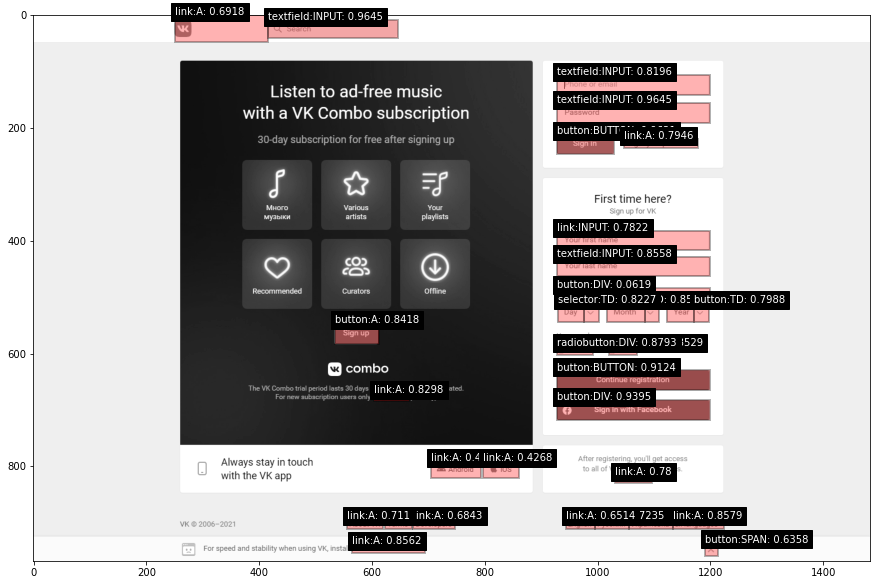

In [29]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in df[df.label_text != 'n/a'].iterrows():
    x, y, w, h = r.x, r.y, r.width, r.height  
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    
    # print(r.tag_name, r.label_text, (x,y,w,h), r.element_id)
    
    axes.add_patch(patch)
    plt.text(x, y, 
             decoder_dict[r.label] + ':' + r.tag_name + ': ' + str(round(r.iou, 4)), # + ':' + str((x, y, w, h)),  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
